# 1. Data Description

#### For players.csv dataset  
-Number of observations: 196 observations  
-Number of variables: 7 variables  
-Summary statistics:  
The played_hours has min value 0.00, max value 223.10 and mean value 5.85. The Age has min value 9.00, max value 58.00 and mean value 21.14. Experience has 5 different levels (Beginner/Amateur/Regular/Veteran/Pro). Gender has 7 types (Male/Female/Non-binary/Prefer not to say/Agender/Two-Spirited/Other).  
-Name and type of variables:  
experience, subscribe, gender, hashedEmail, name are qualitative variables. played_hours, Age are quantitative variables.  
-Issues seen in the data:  
It has NA in Age, which means some Age data is unknown. hashedEmail and name are not analytically meaningful.  
-Other potential issues:  
Age, gender, experience are self-reported, which may cause survey response bias.  
-How the data were collected:  
When players enter Minecraft server, the basic information is recorded and collected by the research project system.  

#### For sessions.csv dataset  
-Number of observations: 1535 observations  
-Number of variables: 5 variables  
-Explanation of variables:  
start_time is the recorded start time of a user session. end_time is the recorded end time of a user session. original_start_time is the system’s original timestamp corresponding to the session start. original_end_time is the system’s original timestamp corresponding to the session end.  
-Summary statistics:  
We can calculate the duration using duration = end_time - start_time.  
-Name and type of variables:  
hashedEmail, start_time, end_time are qualitative variables. original_start_time, original_end_time are quantitative variables.  
-Issues seen in the data:  
Some session records are incomplete, missing start or end times. The dataset contains two different time formats, human-readable datetime strings and numeric system timestamps. hashedEmail is not analytically meaningful.  
-Other potential issues:  
The idle time cannot be distinguished.  
-How the data were collected:  
The Minecraft server automatically logs each player’s login and logout time.

# 2. Questions

#### Broad question: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

#### Specific question: 
To what extent do game engagement (measured by played_hours), age and gender predict newsletter subscription behaviour, and do these effects vary across different player experience levels?  

#### Description:  
The players.csv dataset can help me address the question. I will solve the question using two graphs, one is bar chart and one is scatter plot. For the bar chart, I will select gender as my explanatory variable and subscribe as my response variable. Then use the bar chart to find the proportion of subscription for different genders across various player types, and compare to find which gender tends to have more subscription. For the scatter plot, I will select played_hours and Age as my explanatory variables, and subscribe as my response variable. Then I will ignore the unknown values (NA) in the dataset and convert Age into numeric value. After that, I will plot a scatter plot with played_hours on x-axis and Age on y-axis and use two different colour for subscribe or not (True of False) to compare the charateristics of subscription behaviour across various player types.

# 3. Exploratory Data Analysis and Visualization

In [1]:
library(repr)
library(tidyverse)
library(readxl)
source("cleanup.R")
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [34]:
players<-read_excel("data/players.xlsx")
sessions<-read_excel("data/sessions.xlsx")
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12


In [47]:
players_adjusted<-players|>
filter(Age!= "NA")|>
mutate(Age=as.numeric(Age))
players_adjusted

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [50]:
players_mean<-players_adjusted|>
group_by(subscribe) |>
summarize(avg_played_hours = mean(played_hours), avg_Age = mean(Age))
players_mean

subscribe,avg_played_hours,avg_Age
<lgl>,<dbl>,<dbl>
FALSE,0.5019231,23.7500
TRUE,7.8830986,20.1831


### (1) Find the proportion of subscription for different genders across various player types

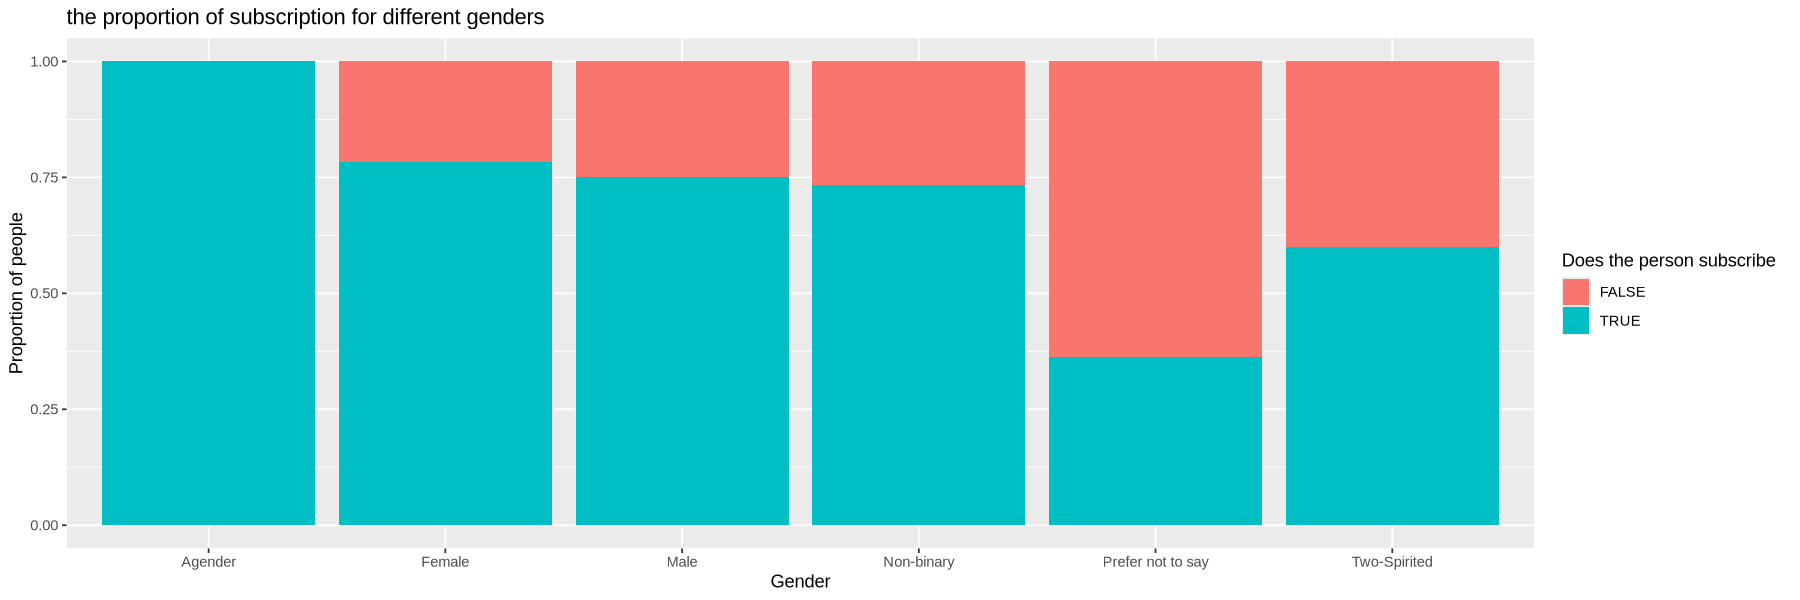

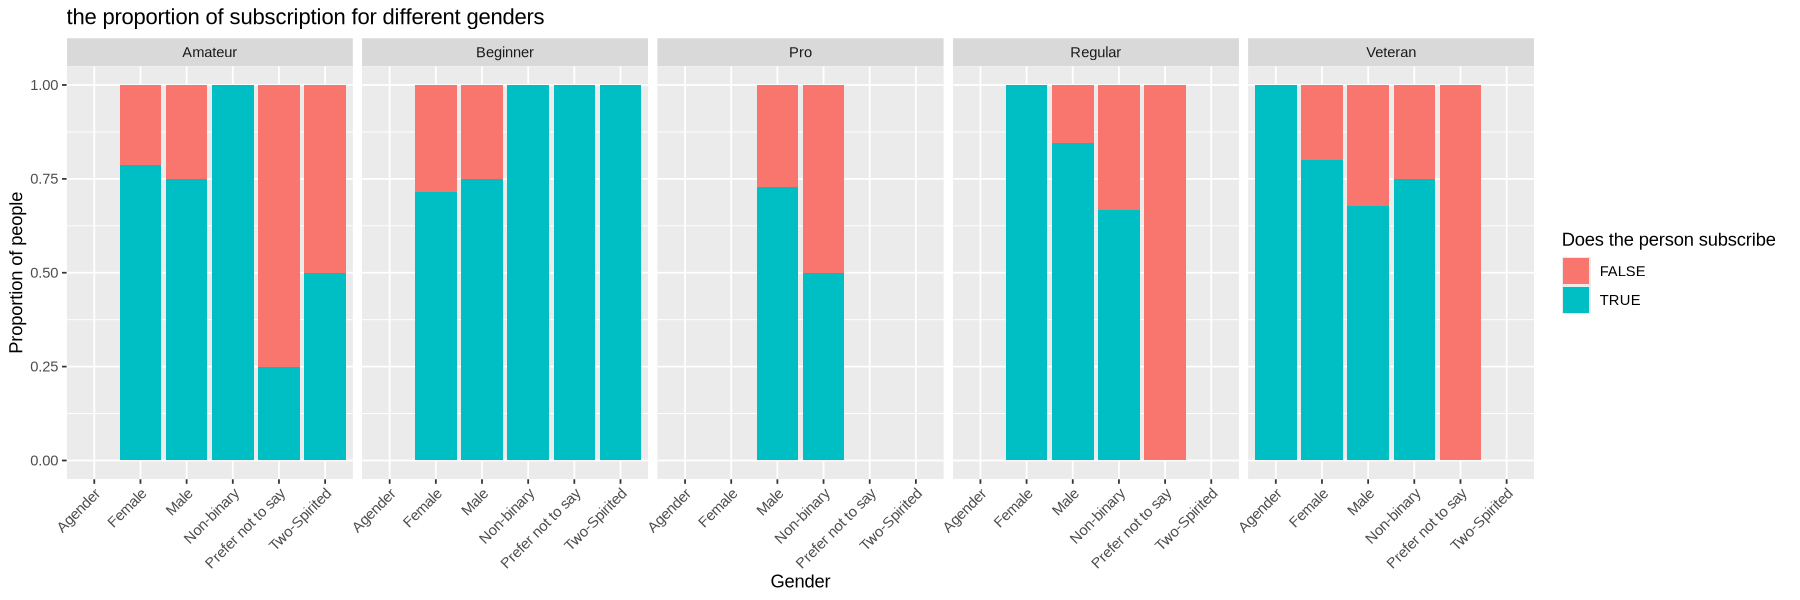

In [52]:
options(repr.plot.width = 15, repr.plot.height = 5)
bar_plot <- players_adjusted|>
ggplot(aes(x = gender, fill = subscribe)) + 
geom_bar(position = 'fill') + 
xlab("Gender") +
ylab("Proportion of people") +
labs(fill = "Does the person subscribe") +
ggtitle("the proportion of subscription for different genders")
bar_plots <- bar_plot+
facet_grid(~ experience)+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
bar_plot
bar_plots

Insight I gain from this plot: Based on the bar charts provided, gender appears to have only a weak and inconsistent relationship with subscription behavior. While some gender categories show higher subscription proportions in certain groups, these patterns are not consistent and may be influenced by small sample sizes, especially among less common gender identities.

### (2)  Find the charateristics of subscription behaviour across various player types

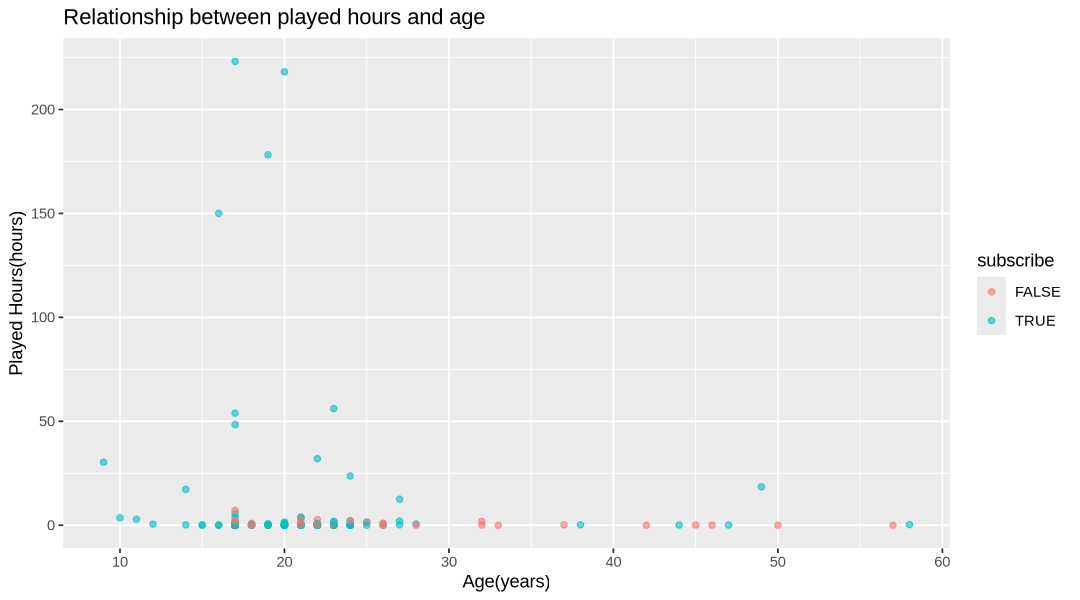

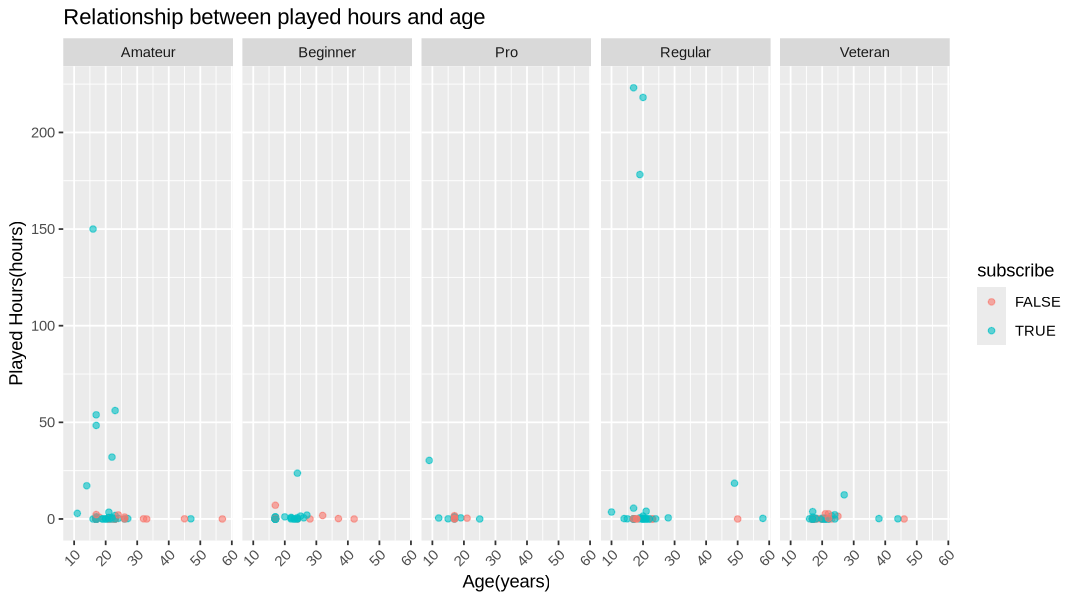

In [57]:
options(repr.plot.width = 9, repr.plot.height = 5)
scatter_plot<- players_adjusted|>
ggplot(aes(x = Age, y = played_hours, colour=subscribe)) + 
geom_point(alpha = 0.6) + 
xlab("Age(years)") +
ylab("Played Hours(hours)") +
ggtitle("Relationship between played hours and age")
scatter_plots<- scatter_plot+
facet_grid(~ experience)+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
scatter_plot
scatter_plots